In [1]:
# 라이브러리 임포트

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
# boston 데이터 세트 로드

bst = load_boston()

bstDF = pd.DataFrame(bst.data, columns = bst.feature_names)

In [3]:
# boston 데이터 세트의 Target은 주택 가격
bstDF['PRICE']=bst.target
print('shape : ', bstDF.shape)
bstDF.head()


shape :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# 결측치 확인
bstDF.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Feature Description

In [5]:
bstDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

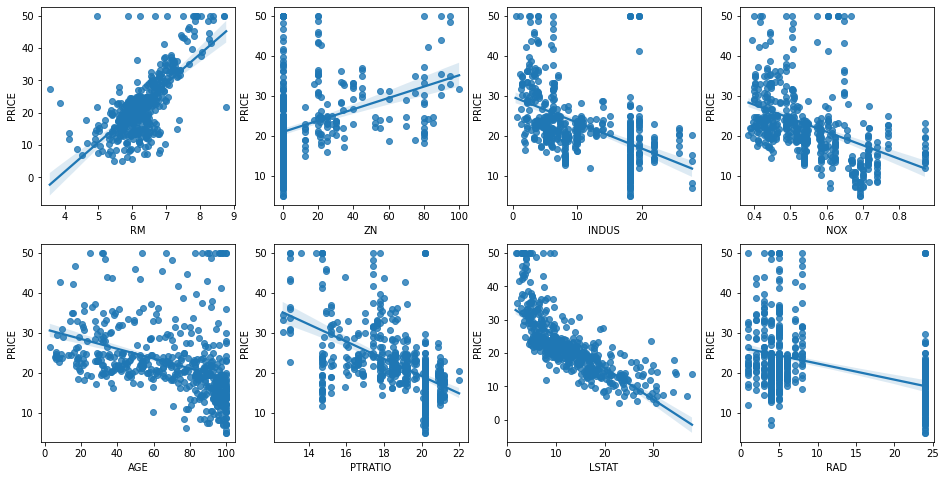

In [6]:
#  'RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD'] 피쳐를 이용해 TARGET 피쳐인 PRICE와의 상관관계를 확인합니다.
columns = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

fig, axes = plt.subplots(figsize=(16, 8), ncols = 4, nrows = 2)
for i, feature in enumerate(columns):
    row = int(i/4)
    col = i%4
    sns.regplot(data = bstDF, x=feature, y='PRICE', ax=axes[row][col])

위 그래프를 통해 직관적으로 PRICE와 RM(거주할 수 있는 방 개수)은 양의 상관관계를 가지고 있고 PRICE와 LSTAT(하위 계층의 비율)은 음의 상관관계를 띄는 모습을 확인할 수 있습니다.

# Linear Model

In [7]:
# 선형회귀 모델 생성을 위한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# 학습에 사용할 데이터 준비
# 학습에 사용할 데이터 준비
y_target = bstDF['PRICE']
X_data = bstDF.drop(['PRICE'], axis=1, inplace=False)

# train, test 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state = 156)

# 선형회귀 모델 생성
lr_model = LinearRegression()

# 선형회귀 모델 학습
lr_model.fit(X_train, y_train)

LinearRegression()

# 성능평가

In [10]:
# X_test를 이용한 예측 값 생성
pred = lr_model.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, pred)

# RMSE 계산
rmse = np.sqrt(mse)

print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))
print('R - squared : {0:.3f}'.format(r2_score(y_test, pred)))

MSE : 17.297
RMSE : 4.159
R - squared : 0.757


# 절편과 회귀계수

In [11]:
# 앞서 생성한 예측 모델의 intercept(절편)과 coefficients(회귀계수)를 확인합니다.
print('intercept(절편) :',lr_model.intercept_)
print('coef(회귀계수) : ',np.round(lr_model.coef_, 1))

intercept(절편) : 40.9955951721646
coef(회귀계수) :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [13]:
# 회귀계수를 DF로 변환해 내림차순으로 출력

coeff = pd.Series(data = np.round(lr_model.coef_,1), index = X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

# 교차검증